In [1]:
import numpy as np 
from matplotlib import pyplot as plt   

In [17]:
xmin = -2; xmax = 2; num = 150

def plot_flow(psi_list, mask = None,
              x=np.linspace(xmin,xmax,num), y=np.linspace(xmin,xmax,num), h=1e-6):
    """
    Plot a potential flow using the streamfunction. The velocity
    vectors are approximated using finite differences.
    
    Inputs:
     - psi: stream function of x,y
     - mask: bool function of x,y for locations to be masked out
     - x,y: 1D spacing array in x,y. defaults to np.linspace(-2,2,25)
     - h:   finite different spacing to compute U,V. defaults to 1e-6
    """
    X,Y = np.meshgrid(x,y)
    if mask:
        X,Y = (np.ma.masked_where(mask(X,Y),X), 
               np.ma.masked_where(mask(X,Y),Y))
    U = 0; V = 0
    for psi in psi_list:
        U =  (psi(X,Y+h)-psi(X,Y-h))/(2*h)
        V = -(psi(X+h,Y)-psi(X-h,Y))/(2*h)
    
    plt.figure(figsize=(4,4),dpi=150)
    plt.quiver(X,Y,U,V)
    plt.contour(X,Y,psi(X,Y),levels=50)
    plt.axis('equal')
    plt.show()

    return U, V


def cosd(angle_in_degree):
    return np.cos(np.deg2rad(angle_in_degree))

def sind(angle_in_degree):
    return np.sin(np.deg2rad(angle_in_degree))
    
PI = np.pi

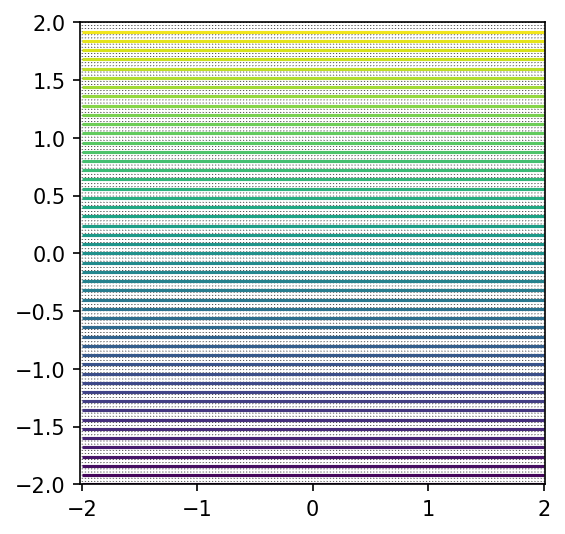

In [10]:
## Uniform Flow Potential Function

alpha = 0; U = 0.01
uniform_flow_psi = lambda  x, y: U*(y*cosd(alpha) - x*sind(alpha)) # alpha in degrees
plot_flow([uniform_flow_psi])

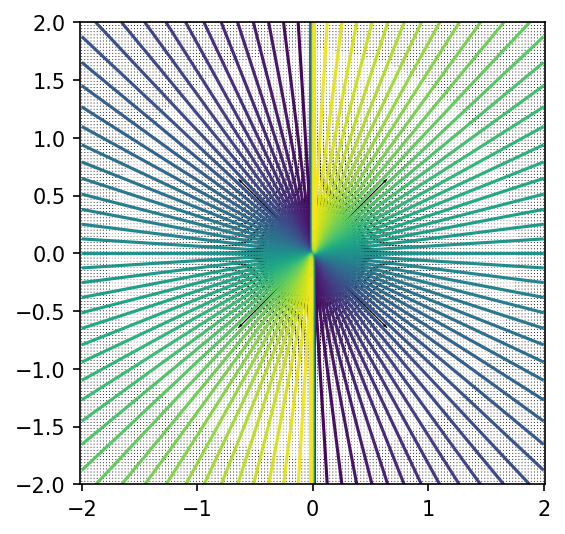

In [11]:
## Source or Sink Source or Sink Potential Function

m = 0.025 # strength
x0 = y0 = 0
source_or_sink_psi = lambda x, y: m/(2*PI) * np.arctan((y-y0)/(x-x0))
source_or_sink_mask = lambda x,y: x**2+y**2<0.01
plot_flow([source_or_sink_psi])

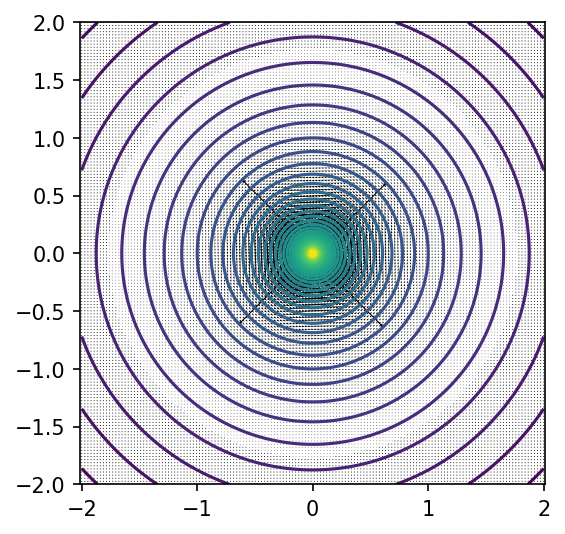

In [12]:
## Irrotational Vortex Irrotational Vortex

circulation = 10
irrotational_vortex_psi = lambda x, y: -circulation/(2*PI)*np.log(np.sqrt(x**2+y**2))
plot_flow([irrotational_vortex_psi])


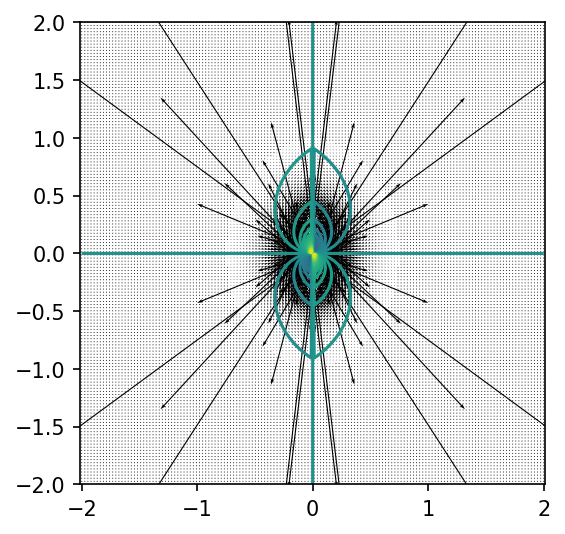

In [13]:
# Doublet

K = 10 # doublet strength
doublet_psi = lambda x, y: -K*sind(np.arctan(y/x))/np.sqrt(x**2+y**2)
plot_flow([doublet_psi])

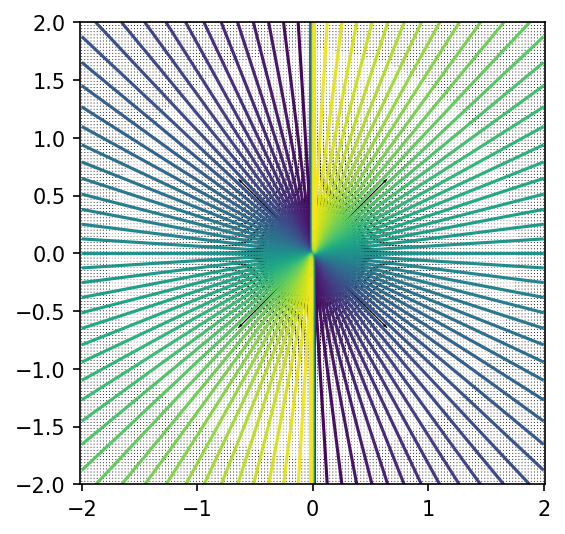

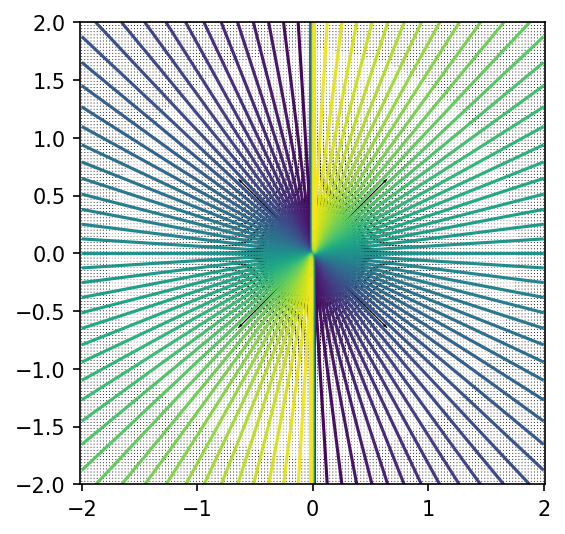

0.0
0.0


In [20]:
# superposition

u0, v0  = plot_flow([source_or_sink_psi])
u1, v1 = plot_flow([doublet_psi, source_or_sink_psi])

print(np.mean(u0-u1))
print(np.mean(v0-v1)) # why they are the same